In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.utils import shuffle

In [2]:
dev = pd.read_csv('development.csv')
eva = pd.read_csv('evaluation.csv')
dev = shuffle(dev)

In [3]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

def PreProcess(sentence):
    sentence = sentence.lower()
    #Remove Special characters
    sentence = re.sub("`!@#$%^&*()_+-\{}|;'':,./<>?", " ", sentence)
    #Remove digits
    sentence = re.sub("(\\d|\\W)+", " ", sentence)
    #Remove single characters
    sentence = re.sub(r"\b[a-z]\b", "", sentence)
    #https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    stemmer=SnowballStemmer("italian")
    sentence = stemmer.stem(sentence)
    return sentence

In [33]:
def CleanText(text):
    sentences = []
    for row in text:
        sentences.append(PreProcess(row))
    return sentences
dev['clean'] = CleanText(dev['text'])
eva['clean'] = CleanText(eva['text'])

In [26]:
#NO
counter_pre = []
words_pre = {}
for s in eva['clean']:
    counter_pre.append(len(s.split()))
    for w in s.split():
        if w not in words_pre:
            words_pre[w] = 1
        words_pre[w] = words_pre[w] + 1

In [5]:
#NO
counter = []
words = {}
for index, row in dev.iterrows():
    counter.append(len(row[0].split()))
    for w in row[0].split():
        if w not in words:
            words[w] = 1
        words[w] = words[w] + 1

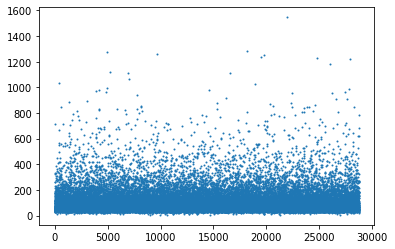

In [6]:
#NO
plt.scatter(range(0,len(counter)),counter,s=1)

(array([2.3156e+04, 4.3430e+03, 8.5400e+02, 2.3700e+02, 1.0000e+02,
        3.9000e+01, 1.3000e+01, 6.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([   5. ,  159.1,  313.2,  467.3,  621.4,  775.5,  929.6, 1083.7,
        1237.8, 1391.9, 1546. ]),
 <a list of 10 Patch objects>)

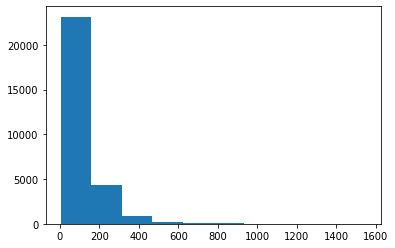

In [7]:
#NO
plt.hist(counter)

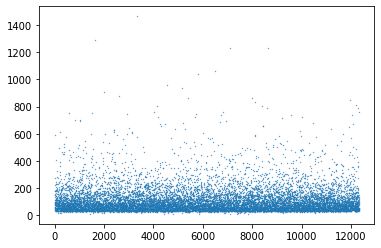

In [28]:
#NO
plt.scatter(range(0,len(counter_pre)),counter_pre,s=.1)

(array([1.0066e+04, 1.7890e+03, 3.0000e+02, 1.0500e+02, 3.6000e+01,
        1.8000e+01, 3.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([   9. ,  154.6,  300.2,  445.8,  591.4,  737. ,  882.6, 1028.2,
        1173.8, 1319.4, 1465. ]),
 <a list of 10 Patch objects>)

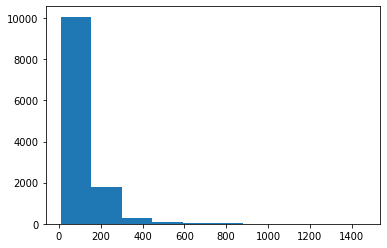

In [29]:
#NO
plt.hist(counter_pre)

In [10]:
#NO
print(len(words))
#words
#for k,v in words.items():
#    if(len(k)==22):
#        print(f"{k} {v}")

print(len(words_pre))
#words_pre
#for k,v in words_pre.items():
#    if(len(k)==1):
# 

p = 0
n = 0
for i in (sentences):
    if i[1] == 1:
        p  = p + 1
    else:
        n = n + 1
print(f'Positive {p} Negative {n}')

153276


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords as sw
from sklearn.feature_extraction .text import TfidfTransformer
stop_words = sw.words('italian')+['']

max_feature = 2000 #len(sentences)

def X_tfidf(sentences,max_f = max_feature):
    #Create a vocabulary of words
    cv = CountVectorizer(min_df = 50, max_df=.8,stop_words=stop_words,max_features=max_f)
    word_count_vector = cv.fit_transform(sentences)

    tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
    X = tfidf_transformer.fit_transform(word_count_vector).toarray()
    return X

In [44]:
X = X_tfidf(dev.iloc[:,2])
Y = X_tfidf(eva.iloc[:,1])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,dev.iloc[:,1],test_size=0.2,random_state=0)

In [36]:
#NO
print(len(cv.vocabulary_.keys()))
for i in list(cv.vocabulary_.keys())[:10]:
    print(f'{i} -> {words_pre[i]}')

53401
hotel -> 37675
lussuoso -> 154
mai -> 3462
soggiornato -> 4130
esperienza -> 2166
complessiva -> 66
prima -> 5860
classe -> 388
direttamente -> 929
accoglienza -> 1221


In [78]:
#NO
from sklearn.decomposition import TruncatedSVD
import numpy as np

svd = TruncatedSVD(n_components=30,random_state=42)
X_svd = svd.fit_transform(X_train)
y_pred = svd.transform(X_test)
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
#NO
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
#NO
from sklearn.svm import SVC
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(SVC(), xtrain_tfidf_ngram, y_train, ytrain_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

C:\Users\mauri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#best is 14 and it does not improve after that anymore [5,20]:
# no data shuffle: accurancy=0.901 
# data shuffle: accurancy=0.902

#for i in range(5,20):
classifier = RandomForestClassifier(n_estimators=14, random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

#print(f"n_estimators={i}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print("--- --- --- --- ---")

[[1480  351]
 [ 227 3693]]
              precision    recall  f1-score   support

         neg       0.87      0.81      0.84      1831
         pos       0.91      0.94      0.93      3920

    accuracy                           0.90      5751
   macro avg       0.89      0.88      0.88      5751
weighted avg       0.90      0.90      0.90      5751

0.8994957398713267
0.8985169296632639
--- --- --- --- ---


In [58]:
y_eval = classifier.predict(Y.reshape(1,-1))

ValueError: Number of features of the model must match the input. Model n_features is 3710 and input n_features is 24646000 

In [72]:
def WriteOnFile(name):
    f = open(name,"w")
    f.write("Id,Predicted\n")
    for index,i in enumerate(y_eval):
        f.write(f"{index},{i}\n")
    f.close

In [73]:
WriteOnFile("out.csv")

In [28]:
dev.iloc[:,1]

4214     neg
7427     neg
5806     neg
27583    pos
6527     pos
        ... 
1342     pos
17480    pos
21989    pos
12036    neg
1310     neg
Name: class, Length: 28754, dtype: object

In [48]:
Y.shape

(12323, 2000)

In [51]:
X.shape

(28754, 2000)

In [59]:
for index,i in enumerate(range(10,20)):
    print(f"{index} {i}")

0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
